In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
score_0 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_0.npy", allow_pickle=True)
score_1 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_1.npy")
score_2 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_2.npy")
score_3 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_3.npy")
score_4 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_4.npy")
score_5 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_5.npy")
score_6 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_6.npy")
score_7 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_7.npy")
score_8 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_8.npy")
score_9 = np.load("../results/1/DTECategorical_dataset_sampling_deterministic/4_breastw/scores_9.npy")

In [ ]:
# Plot distribution of scores
plt.figure(figsize=(10, 5))
sns.kdeplot(score_0, label="score_0")
sns.kdeplot(score_1, label="score_1")
sns.kdeplot(score_2, label="score_2")
sns.kdeplot(score_3, label="score_3")
sns.kdeplot(score_4, label="score_4")
# Plot vertical line at median
plt.axvline(np.median(score_0), color='blue', linestyle='dashed', linewidth=1, label="median score_0")
plt.axvline(np.median(score_1), color='orange', linestyle='dashed', linewidth=1, label="median score_1")
plt.axvline(np.median(score_2), color='green', linestyle='dashed', linewidth=1, label="median score_2")
plt.axvline(np.median(score_3), color='red', linestyle='dashed', linewidth=1, label="median score_3")
plt.axvline(np.median(score_4), color='purple', linestyle='dashed', linewidth=1, label="median score_4")
plt.legend()
plt.title("Distribution of scores")
plt.grid()

plt.show()

In [9]:
import numpy as np
data = np.load("../dataset/synthetic_a1.npy", allow_pickle=True)

In [ ]:
data

In [ ]:
# Plot correlation between features 2 and 4
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(data['X'][:, 2], data['X'][:, 4])
plt.title("Correlation between features 2 and 4")
plt.xlabel("Feature 2")
plt.ylabel("Feature 4")
plt.grid()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# plot cosine scheduler :

x = np.arange(0,10)
mu_min = 0.5
mu_max = 0.9

y = mu_min + 0.5 * (mu_max - mu_min) * (1 + np.cos(x * np.pi / 10))
plt.plot(x, y)
plt.title("Cosine scheduler")
plt.xlabel("Epoch")
plt.ylabel("n")
plt.grid()

In [ ]:
# Same with exponential scheduler :
x = np.arange(0,10)
mu_min = 0.5
mu_max = 0.9
y = mu_min + (mu_max - mu_min) * np.exp(-x)
plt.plot(x, y)
plt.title("Exponential scheduler")
plt.xlabel("Epoch")
plt.ylabel("n")
plt.grid()

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_dag_with_edges(num_nodes: int, num_edges: int):
    # Ensure the number of edges does not exceed the maximum possible acyclic edges
    max_edges = num_nodes * (num_nodes - 1) // 2
    if num_edges > max_edges:
        raise ValueError("Too many edges requested for the number of nodes. Maximum possible edges for DAG exceeded.")
    
    # Create an empty directed graph
    dag = nx.DiGraph()
    
    # Add nodes to the graph
    dag.add_nodes_from(range(num_nodes))
    
    # Generate a topological order of nodes
    nodes = list(dag.nodes)
    random.shuffle(nodes)
    
    # Generate all possible edges (u, v) where u appears before v in topological order
    possible_edges = [(nodes[i], nodes[j]) for i in range(num_nodes) for j in range(i + 1, num_nodes)]
    
    # Randomly select the required number of edges
    selected_edges = random.sample(possible_edges, num_edges)
    
    # Add edges to the graph
    dag.add_edges_from(selected_edges)
    
    return dag

# Parameters
num_nodes = 10
num_edges = 7

# Generate the DAG
dag = generate_random_dag_with_edges(num_nodes, num_edges)

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(dag, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", arrowstyle="->", arrowsize=15)
plt.title("Randomly Generated Directed Acyclic Graph (DAG) with Fixed Number of Edges")
plt.show()

(5000, 10)


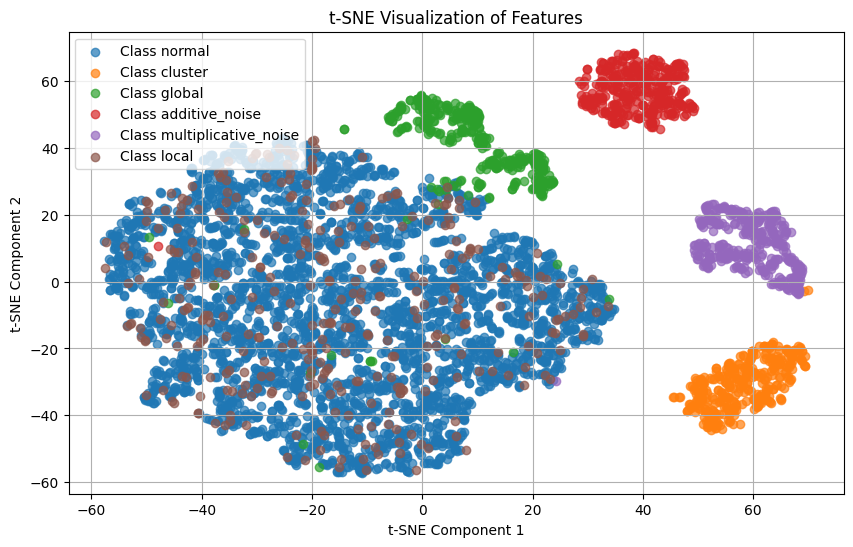

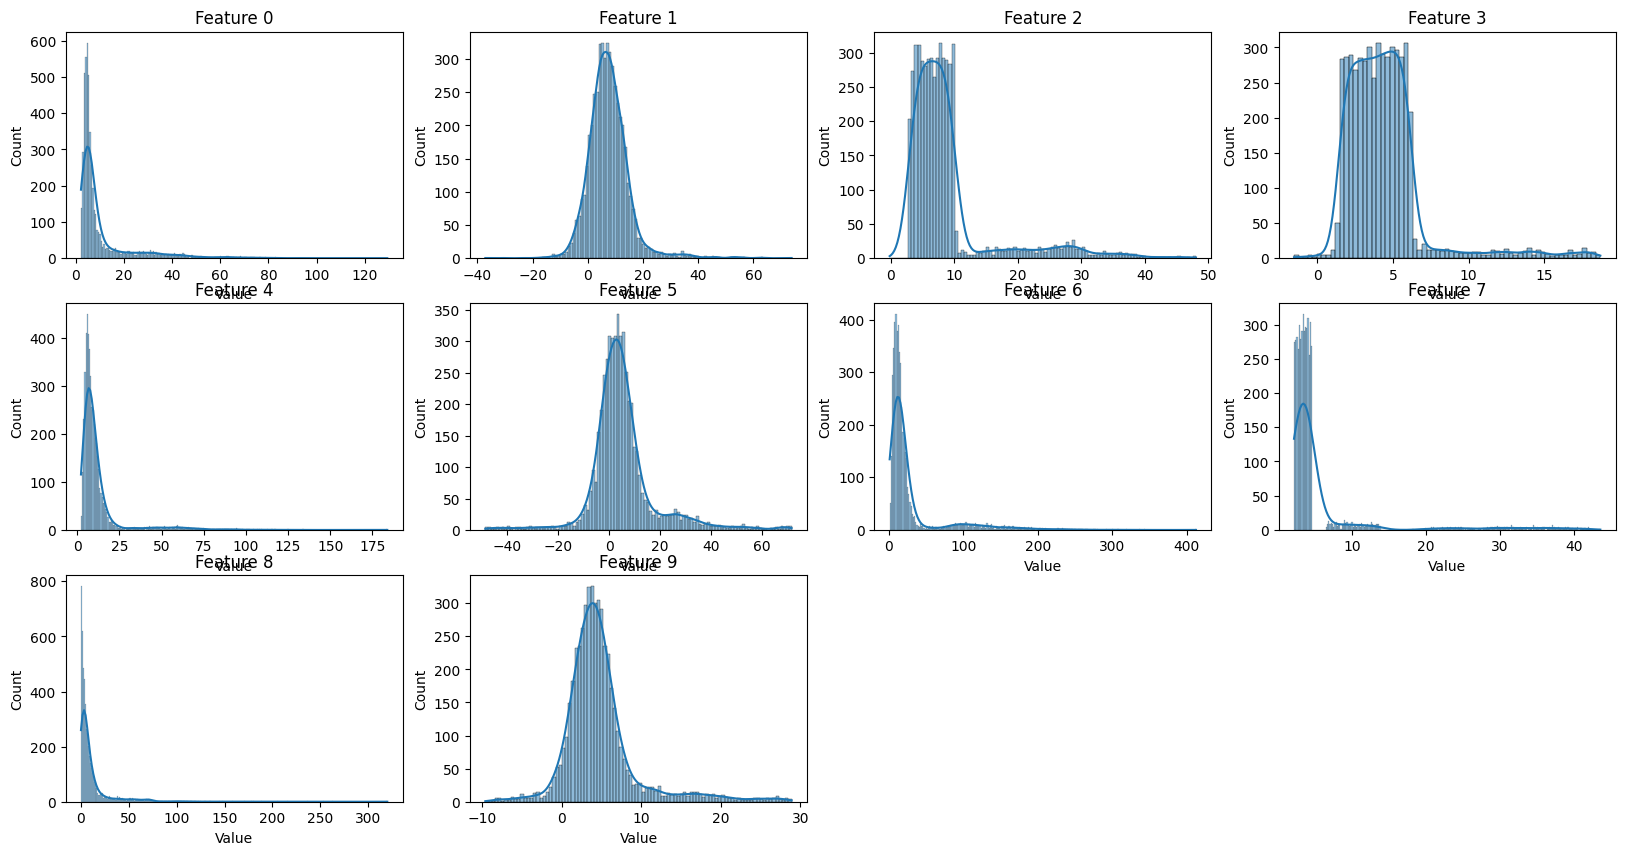

In [1]:
import numpy as np
# TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load data
data = np.load("/home/elouan/code/code_repo/test/features.npy", allow_pickle=True)
labels = np.load("/home/elouan/code/code_repo/test/labels.npy", allow_pickle=True)
labels = labels.astype(int)
# Count nan
# Remove nan
nan_count = np.sum(np.isnan(data))
labels = labels[~np.isnan(data).any(axis=1)]
data = data[~np.isnan(data).any(axis=1)]
print(data.shape)
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

anomaly_code = {
        "normal": 0,
        "cluster": 1,
        "global": 2,
        "dependecy": 3,
        "additive_noise": 4,
        "multiplicative_noise": 5,
        "local": 6,
    }
anomaly_code = {v: k for k, v in anomaly_code.items()}
# Plot t-SNE
plt.figure(figsize=(10, 6))
# Plot each class separately
for i in np.unique(labels):
    plt.scatter(data_tsne[labels == i, 0], data_tsne[labels == i, 1], label=f"Class {anomaly_code[i]}", alpha
=0.7, )
plt.title("t-SNE Visualization of Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.legend()
plt.show()

# Plot distribution of each features :
import seaborn as sns
import matplotlib.pyplot as plt

# Plot all features in the same plot in subplots
plt.figure(figsize=(20, 10))
for i in range(data.shape[1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[:, i], kde=True)
    plt.title(f"Feature {i}")
    plt.xlabel("Value")
    
    plt.ylabel("Count")

In [ ]:
print(sum(labels > 0))
print(np.unique(labels))